In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = r"../data/raw/ontime"

In [16]:
# This function reduces the memory usage of a DataFrame by downcasting numeric types
def downcast(df, verbose = True):
    start_memory = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == "object":
            pass
        elif dtype_name == "bool":
            df[col] = df[col].astype("int8")
        elif dtype_name.startswith("int") or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast = "integer")
        else:
            df[col] = pd.to_numeric(df[col], downcast = "float")
    end_memory = df.memory_usage().sum() / 1024 ** 2

    if verbose:
        print("{:.1f}% compressed".format(100 * (start_memory - end_memory) / start_memory))

    return df

In [17]:
df = pd.read_csv(f'{path_to_data}/_2018_1/_2018_1.csv', low_memory=False)


In [18]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2018,1,1,14,7,2018-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,1,1,15,1,2018-01-15,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,1,1,16,2,2018-01-16,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,1,1,17,3,2018-01-17,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,1,1,18,4,2018-01-18,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621393,2018,1,1,23,2,2018-01-23,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621394,2018,1,1,24,3,2018-01-24,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621395,2018,1,1,25,4,2018-01-25,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621396,2018,1,1,26,5,2018-01-26,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [19]:
list(df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline ',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 '

In [20]:
df = df[[
 'FlightDate',
 'Marketing_Airline_Network',
 'DOT_ID_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginCityMarketID',
 'OriginState',
 'DestAirportID',
 'DestCityMarketID',
 'DestState',
 'DepTime',
 'DepDelay',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'ActualElapsedTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'Duplicate']]

In [21]:
df = downcast(df, verbose = True)

48.1% compressed


In [22]:
df

,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,...,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Duplicate
0,2018-01-14,UA,19977,4443,NaN,NaN,20366,N14902,4443,11618,...,0,151.0,1,628,NaN,NaN,NaN,NaN,NaN,N
1,2018-01-15,UA,19977,4443,NaN,NaN,20366,N12167,4443,11618,...,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0,N
2,2018-01-16,UA,19977,4443,NaN,NaN,20366,N11109,4443,11618,...,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0,N
3,2018-01-17,UA,19977,4443,NaN,NaN,20366,N16546,4443,11618,...,0,138.0,1,628,NaN,NaN,NaN,NaN,NaN,N
4,2018-01-18,UA,19977,4443,NaN,NaN,20366,N11165,4443,11618,...,0,134.0,1,628,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621393,2018-01-23,AA,19805,407,NaN,NaN,19805,N170US,407,14100,...,0,191.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621394,2018-01-24,AA,19805,407,NaN,NaN,19805,N979UY,407,14100,...,0,179.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621395,2018-01-25,AA,19805,407,NaN,NaN,19805,N182UW,407,14100,...,0,173.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621396,2018-01-26,AA,19805,407,NaN,NaN,19805,N580UW,407,14100,...,0,155.0,1,1013,NaN,NaN,NaN,NaN,NaN,N


In [24]:
# Get the list of all csv files in path_to_data and all subfolders
csv_files = []
for root, dirs, files in os.walk(path_to_data):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(os.path.join(root, f))
csv_files

['../data/raw/ontime\\_2018_1\\_2018_1.csv',
 '../data/raw/ontime\\_2018_10\\_2018_10.csv',
 '../data/raw/ontime\\_2018_11\\_2018_11.csv',
 '../data/raw/ontime\\_2018_12\\_2018_12.csv',
 '../data/raw/ontime\\_2018_2\\_2018_2.csv',
 '../data/raw/ontime\\_2018_3\\_2018_3.csv',
 '../data/raw/ontime\\_2018_4\\_2018_4.csv',
 '../data/raw/ontime\\_2018_5\\_2018_5.csv',
 '../data/raw/ontime\\_2018_6\\_2018_6.csv',
 '../data/raw/ontime\\_2018_7\\_2018_7.csv',
 '../data/raw/ontime\\_2018_8\\_2018_8.csv',
 '../data/raw/ontime\\_2018_9\\_2018_9.csv',
 '../data/raw/ontime\\_2019_1\\_2019_1.csv',
 '../data/raw/ontime\\_2019_10\\_2019_10.csv',
 '../data/raw/ontime\\_2019_11\\_2019_11.csv',
 '../data/raw/ontime\\_2019_12\\_2019_12.csv',
 '../data/raw/ontime\\_2019_2\\_2019_2.csv',
 '../data/raw/ontime\\_2019_3\\_2019_3.csv',
 '../data/raw/ontime\\_2019_4\\_2019_4.csv',
 '../data/raw/ontime\\_2019_5\\_2019_5.csv',
 '../data/raw/ontime\\_2019_6\\_2019_6.csv',
 '../data/raw/ontime\\_2019_7\\_2019_7.csv'

In [ ]:
def load_data(file):
    df = pd.read_csv(file, low_memory=False, encoding='latin-1')
    df = df[[
     'FlightDate',
     'Marketing_Airline_Network',
     'DOT_ID_Marketing_Airline',
     'Flight_Number_Marketing_Airline',
     'DOT_ID_Originally_Scheduled_Code_Share_Airline',
     'Flight_Num_Originally_Scheduled_Code_Share_Airline',
     'DOT_ID_Operating_Airline',
     'Tail_Number',
     'Flight_Number_Operating_Airline',
     'OriginAirportID',
     'OriginCityMarketID',
     'OriginState',
     'DestAirportID',
     'DestCityMarketID',
     'DestState',
     'DepTime',
     'DepDelay',
     'WheelsOff',
     'WheelsOn',
     'ArrTime',
     'ArrDelay',
     'Cancelled',
     'CancellationCode',
     'Diverted',
     'ActualElapsedTime',
     'Flights',
     'Distance',
     'CarrierDelay',
     'WeatherDelay',
     'NASDelay',
     'SecurityDelay',
     'LateAircraftDelay']]
    df['source_file'] = file
    return df

In [ ]:
# Loop through the files, limiting columns and appending to a df
for file in csv_files:
    if file == csv_files[0]:
        df_main = load_data(file)
    else:
        print(f"Loading {file}")
        df_temp = load_data(file)
        df_main = pd.concat([df_main, df_temp], ignore_index=True)

df_main = downcast(df_main, verbose = True)
df_main

Loading ../data/raw/ontime\_2018_10\_2018_10.csv
Loading ../data/raw/ontime\_2018_11\_2018_11.csv
Loading ../data/raw/ontime\_2018_12\_2018_12.csv
Loading ../data/raw/ontime\_2018_2\_2018_2.csv
Loading ../data/raw/ontime\_2018_3\_2018_3.csv
Loading ../data/raw/ontime\_2018_4\_2018_4.csv
Loading ../data/raw/ontime\_2018_5\_2018_5.csv
Loading ../data/raw/ontime\_2018_6\_2018_6.csv
Loading ../data/raw/ontime\_2018_7\_2018_7.csv
Loading ../data/raw/ontime\_2018_8\_2018_8.csv
Loading ../data/raw/ontime\_2018_9\_2018_9.csv
Loading ../data/raw/ontime\_2019_1\_2019_1.csv
Loading ../data/raw/ontime\_2019_10\_2019_10.csv
Loading ../data/raw/ontime\_2019_11\_2019_11.csv
Loading ../data/raw/ontime\_2019_12\_2019_12.csv
Loading ../data/raw/ontime\_2019_2\_2019_2.csv
Loading ../data/raw/ontime\_2019_3\_2019_3.csv
Loading ../data/raw/ontime\_2019_4\_2019_4.csv
Loading ../data/raw/ontime\_2019_5\_2019_5.csv
Loading ../data/raw/ontime\_2019_6\_2019_6.csv
Loading ../data/raw/ontime\_2019_7\_2019_7.csv
L

,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,...,CancellationCode,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-01-14,UA,19977.0,4443.0,NaN,NaN,20366,N14902,4443.0,11618,...,NaN,0,151.0,1,628,NaN,NaN,NaN,NaN,NaN
1,2018-01-15,UA,19977.0,4443.0,NaN,NaN,20366,N12167,4443.0,11618,...,NaN,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0
2,2018-01-16,UA,19977.0,4443.0,NaN,NaN,20366,N11109,4443.0,11618,...,NaN,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0
3,2018-01-17,UA,19977.0,4443.0,NaN,NaN,20366,N16546,4443.0,11618,...,NaN,0,138.0,1,628,NaN,NaN,NaN,NaN,NaN
4,2018-01-18,UA,19977.0,4443.0,NaN,NaN,20366,N11165,4443.0,11618,...,NaN,0,134.0,1,628,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712872,2025-01-08,AA,19805.0,5034.0,NaN,NaN,20397,N601EN,5034.0,10874,...,NaN,0,101.0,1,394,NaN,NaN,NaN,NaN,NaN
49712873,2025-01-09,AA,19805.0,5034.0,NaN,NaN,20397,N558NN,5034.0,10874,...,NaN,0,89.0,1,394,NaN,NaN,NaN,NaN,NaN
49712874,2025-01-10,AA,19805.0,5034.0,NaN,NaN,20397,N597NN,5034.0,10874,...,B,0,NaN,1,394,NaN,NaN,NaN,NaN,NaN
49712875,2025-01-11,AA,19805.0,5034.0,NaN,NaN,20397,N608NN,5034.0,10874,...,NaN,0,133.0,1,394,3.0,0.0,24.0,0.0,15.0


In [34]:
df_main.to_csv(f'{path_to_data}/combined.csv', index=False)

In [33]:
df_main['FlightDate'].unique()

array(['2018-01-14', '2018-01-15', '2018-01-16', ..., '2025-01-11',
       '2025-01-18', '2025-01-19'], shape=(2588,), dtype=object)

In [3]:
df_main = pd.read_csv(f'{path_to_data}/combined.csv')

In [4]:
df_main

,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,...,CancellationCode,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-01-14,UA,19977.0,4443.0,NaN,NaN,20366,N14902,4443.0,11618,...,NaN,0,151.0,1,628,NaN,NaN,NaN,NaN,NaN
1,2018-01-15,UA,19977.0,4443.0,NaN,NaN,20366,N12167,4443.0,11618,...,NaN,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0
2,2018-01-16,UA,19977.0,4443.0,NaN,NaN,20366,N11109,4443.0,11618,...,NaN,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0
3,2018-01-17,UA,19977.0,4443.0,NaN,NaN,20366,N16546,4443.0,11618,...,NaN,0,138.0,1,628,NaN,NaN,NaN,NaN,NaN
4,2018-01-18,UA,19977.0,4443.0,NaN,NaN,20366,N11165,4443.0,11618,...,NaN,0,134.0,1,628,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712872,2025-01-08,AA,19805.0,5034.0,NaN,NaN,20397,N601EN,5034.0,10874,...,NaN,0,101.0,1,394,NaN,NaN,NaN,NaN,NaN
49712873,2025-01-09,AA,19805.0,5034.0,NaN,NaN,20397,N558NN,5034.0,10874,...,NaN,0,89.0,1,394,NaN,NaN,NaN,NaN,NaN
49712874,2025-01-10,AA,19805.0,5034.0,NaN,NaN,20397,N597NN,5034.0,10874,...,B,0,NaN,1,394,NaN,NaN,NaN,NaN,NaN
49712875,2025-01-11,AA,19805.0,5034.0,NaN,NaN,20397,N608NN,5034.0,10874,...,NaN,0,133.0,1,394,3.0,0.0,24.0,0.0,15.0


In [5]:
df_main.columns

Index(['FlightDate', 'Marketing_Airline_Network', 'DOT_ID_Marketing_Airline',
       'Flight_Number_Marketing_Airline',
       'DOT_ID_Originally_Scheduled_Code_Share_Airline',
       'Flight_Num_Originally_Scheduled_Code_Share_Airline',
       'DOT_ID_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginCityMarketID', 'OriginState', 'DestAirportID',
       'DestCityMarketID', 'DestState', 'DepTime', 'DepDelay', 'WheelsOff',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'Cancelled', 'CancellationCode',
       'Diverted', 'ActualElapsedTime', 'Flights', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Aggregate by 'FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID'
df_agg = df_main.groupby(
    ['FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID']
    ).agg(
    count_flights=pd.NamedAgg(column="FlightDate", aggfunc="count"),
    avg_DepDelay=pd.NamedAgg(column="DepDelay", aggfunc="mean"),
    avg_ArrDelay=pd.NamedAgg(column="ArrDelay", aggfunc="mean"),
    count_Cancelled=pd.NamedAgg(column="Cancelled", aggfunc="sum"),
    avg_Distance=pd.NamedAgg(column="Distance", aggfunc="mean"),
    avg_time = pd.NamedAgg(column="ActualElapsedTime", aggfunc="mean")
).reset_index()
df_agg

,FlightDate,Marketing_Airline_Network,OriginAirportID,DestAirportID,count_flights,avg_DepDelay,avg_ArrDelay,count_Cancelled,avg_Distance,avg_time
0,2018-01-01,AA,10135,11057,2,6.500000,-8.500000,0,481.0,118.000000
1,2018-01-01,AA,10135,14100,2,-9.500000,1.500000,0,55.0,52.500000
2,2018-01-01,AA,10136,11298,6,209.333333,219.833333,0,158.0,69.000000
3,2018-01-01,AA,10140,11298,9,5.777778,-2.222222,0,569.0,97.777778
4,2018-01-01,AA,10140,12892,3,3.000000,-7.000000,0,677.0,125.333333
...,...,...,...,...,...,...,...,...,...,...
18151031,2025-01-31,WN,15376,12892,1,2.000000,5.000000,0,451.0,103.000000
18151032,2025-01-31,WN,15376,13232,1,-2.000000,1.000000,0,1440.0,198.000000
18151033,2025-01-31,WN,15376,14679,1,-5.000000,-10.000000,0,368.0,75.000000
18151034,2025-01-31,WN,15624,10693,2,-2.000000,-11.000000,0,389.0,81.000000


In [7]:
df_agg['Marketing_Airline_Network'].value_counts()

Marketing_Airline_Network
AA    3882104
WN    3326324
DL    3170811
UA    3123239
AS    1122223
NK     993139
F9     829223
B6     794717
G4     738031
HA     163601
VX       7624
Name: count, dtype: int64

In [8]:
# Aggregate by 'FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID'
df_main['ym'] = pd.to_datetime(df_main['FlightDate']).dt.to_period('M')

df_agg2 = df_main.groupby(
    ['ym', 'Marketing_Airline_Network', 'OriginAirportID', 'OriginState']
    ).agg(
    count_flights=pd.NamedAgg(column="FlightDate", aggfunc="count"),
    avg_DepDelay=pd.NamedAgg(column="DepDelay", aggfunc="mean"),
    avg_ArrDelay=pd.NamedAgg(column="ArrDelay", aggfunc="mean"),
    count_Cancelled=pd.NamedAgg(column="Cancelled", aggfunc="sum"),
    avg_Distance=pd.NamedAgg(column="Distance", aggfunc="mean"),
    avg_time = pd.NamedAgg(column="ActualElapsedTime", aggfunc="mean")
).reset_index()
df_agg2

,ym,Marketing_Airline_Network,OriginAirportID,OriginState,count_flights,avg_DepDelay,avg_ArrDelay,count_Cancelled,avg_Distance,avg_time
0,2018-01,AA,10135,PA,124,4.791667,4.366667,4,268.000000,87.475000
1,2018-01,AA,10136,TX,169,11.463855,11.560241,3,158.000000,58.156627
2,2018-01,AA,10140,NM,526,2.393474,-4.798464,5,578.988593,110.700576
3,2018-01,AA,10155,TX,111,12.905660,12.179245,5,89.000000,51.311321
4,2018-01,AA,10185,LA,89,8.168675,9.156627,6,285.000000,82.373494
...,...,...,...,...,...,...,...,...,...,...
103354,2025-01,WN,15016,MO,3015,8.383601,-2.149195,214,737.427529,120.541682
103355,2025-01,WN,15304,FL,1849,7.193798,0.689617,44,917.302326,150.413104
103356,2025-01,WN,15370,OK,375,0.402778,-6.813889,15,514.480000,99.880556
103357,2025-01,WN,15376,AZ,366,2.185596,-5.681440,5,626.243169,103.296399


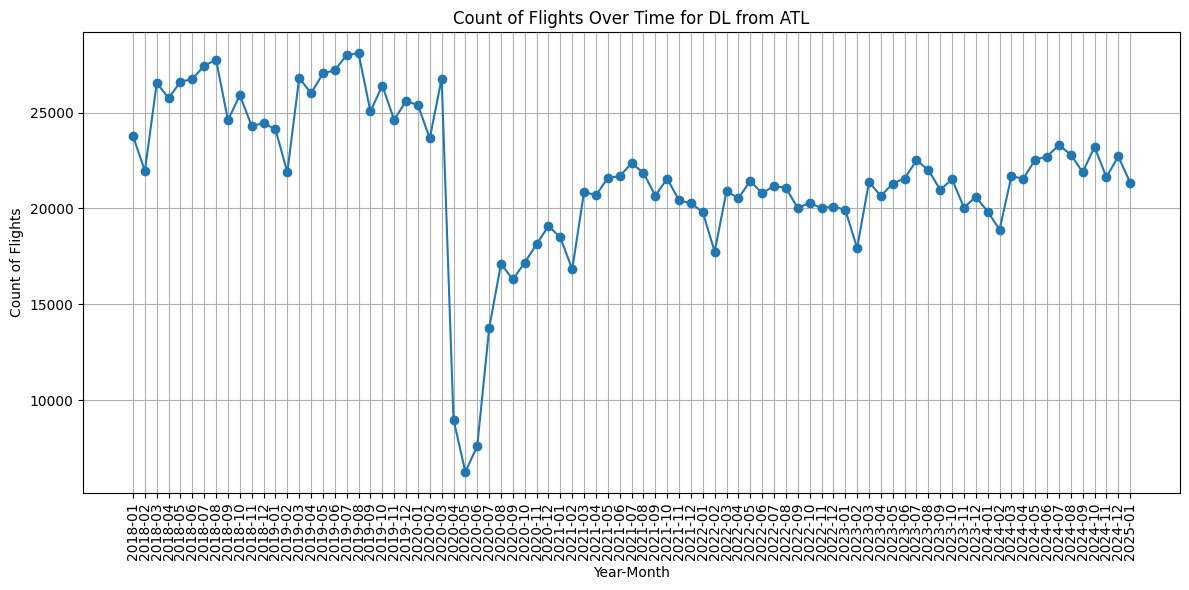

In [10]:
# Line plot of count_flights over time for Marketing_Airline_Network=="DL" and OriginAirportID==10397
import matplotlib.pyplot as plt
df_plot = df_agg2[(df_agg2['Marketing_Airline_Network'] == 'DL') & (df_agg2['OriginAirportID'] == 10397)]
plt.figure(figsize=(12, 6))
plt.plot(df_plot['ym'].astype(str), df_plot['count_flights'], marker='o')
plt.title('Count of Flights Over Time for DL from ATL')
plt.xlabel('Year-Month')
plt.ylabel('Count of Flights')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
test = pd.read_csv(r"C:\Users\Steven\Downloads\20240619041500.gkg.csv\20240619041500.gkg.csv", delimiter='\t', encoding='utf-8', low_memory=False, header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,20240619041500-0,20240619041500,1,abc7.com,https://abc7.com/post/suspect-identified-juan-...,NaN,NaN,ARREST;SOC_GENERALCRIME;CRISISLEX_C07_SAFETY;C...,"LEGISLATION,801;EPU_POLICY_LAW,801;SECURITY_SE...",NaN,...,"wc:384,c12.1:20,c12.10:36,c12.12:14,c12.13:6,c...",https://cdn.abcotvs.com/dip/images/14972733_bu...,NaN,NaN,https://youtube.com/c/ABC7;,NaN,"West Covina,57;Foothill Transit,130;California...","1000000,dollars bail,414;10,Freeway,859;",NaN,<PAGE_LINKS>https://abc7.com/post/baldwin-park...
1,20240619041500-1,20240619041500,1,tenterfieldstar.com.au,https://www.tenterfieldstar.com.au/story/86677...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_LEADER;ALLIANCE;WB_508_P...,"ELECTION,4631;CRISISLEX_C07_SAFETY,3211;CRISIS...","1#France#FR#FR#46#2#FR;4#Callide, Queensland, ...",...,"wc:1070,c1.2:3,c1.3:8,c12.1:34,c12.10:110,c12....",https://www.tenterfieldstar.com.au/images/tran...,https://www.tenterfieldstar.com.au/images/tran...,https://pic.twitter.com/BN00QxQMmd;,https://dailymotion.com/embed/video/x90jw02\;,715|30||existing assets that we've got#1836|31...,"Opposition Leader Peter Dutton,31;Mount Piper,...","2,reactors,777;7,built before 2050,854;22,ener...",NaN,<PAGE_LINKS>https://www.newcastleherald.com.au...
2,20240619041500-2,20240619041500,1,tvguide.co.uk,https://www.tvguide.co.uk/schedule/437f0eaf-97...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_KILLER;TAX_MILITARY_TITL...,"TAX_FNCACT_KILLER,206;TAX_MILITARY_TITLE_CAPTA...",NaN,...,"wc:94,c12.1:9,c12.10:10,c12.12:4,c12.13:3,c12....",https://www.tvguide.co.uk/schedule/437f0eaf-97...,NaN,NaN,NaN,NaN,"Captain Gregson,257;Detective Bell,276;Chris B...","2,Episode 9 of 24,74;9,of 24,82;",NaN,<PAGE_LINKS>https://www.tvguide.co.uk/channel/...
3,20240619041500-3,20240619041500,1,peacearchnews.com,https://www.peacearchnews.com/news/bc-libertie...,"PROTEST#100##4#Vancouver, British Columbia, Ca...","PROTEST#100##4#Vancouver, British Columbia, Ca...",SLFID_CIVIL_LIBERTIES;SECURITY_SERVICES;TAX_FN...,"TAX_FNCACT_DIRECTOR,1998;TAX_FNCACT_DIRECTOR,2...","1#Israel#IS#IS#31.5#34.75#IS;4#Gaza, Israel (G...",...,"wc:622,c1.4:1,c12.1:46,c12.10:63,c12.11:1,c12....",https://www.bpmcdn.com/f/files/todayinbc/2024-...,https://www.bpmcdn.com/f/files/todayinbc/2024-...,NaN,https://youtube.com/channel/UCzkW-fIDEkntyikpB...,NaN,"Liberties Association,38;Vancouver Police Depa...","100,of those demonstrators gathered,178;303,se...",NaN,<PAGE_TITLE>B.C. liberties group says police m...
4,20240619041500-4,20240619041500,1,nzherald.co.nz,https://www.nzherald.co.nz/entertainment/marri...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_BRIDE;MEDIA_MSM;MANMADE_...,"TAX_FNCACT_SALESWOMAN,879;TAX_FNCACT_BRIDE,33;...",NaN,...,"wc:815,c1.1:1,c12.1:77,c12.10:69,c12.12:21,c12...",https://www.nzherald.co.nz/resizer/v2/SXMMPYTX...,https://www.nzherald.co.nz/resizer/v2/FVMWVKCM...,NaN,https://youtube.com/user/nzheraldtv;,2946|44||I don't feel a strong sexual urge tow...,"Married At First Sight,25;Mike Wilson,159;Kara...","2,brides,2101;",NaN,<PAGE_LINKS>https://www.nzherald.co.nz/enterta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,20240619041500-1327,20240619041500,1,kmbc.com,https://www.kmbc.com/article/kansas-city-polic...,NaN,NaN,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_KANSAS;S...,"WB_168_ROADS_AND_HIGHWAYS,146;WB_135_TRANSPORT...",NaN,...,"wc:57,c12.1:3,c12.10:3,c12.12:1,c12.13:2,c12.3...",https://kubrick.htvapps.com/htv-prod-media.s3....,NaN,NaN,https://youtube.com/user/kmbctv;,NaN,"Kansas City,13;Analeigha Cubie,52;Kansas City,386","71,Highway,114;5,feet,130;4,inches tall,136;12...",NaN,<PAGE_AUTHORS>Nick Sloan</PAGE_AUTHORS><PAGE_T...
1328,20240619041500-1328,20240619041500,1,myspiritfm.com,https://www.myspiritfm.com/News?view=post&blog...,NaN,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...,"TAX_FNCACT_CITIZEN,1005;TAX_FNCACT_EMPLOYERS,2...",1#United States#US#US#39.828175#-98.5795#US;3#...,...,"wc:484,c1.2:1,c1.4:1,c12.1:29,c12.10:45,c12.